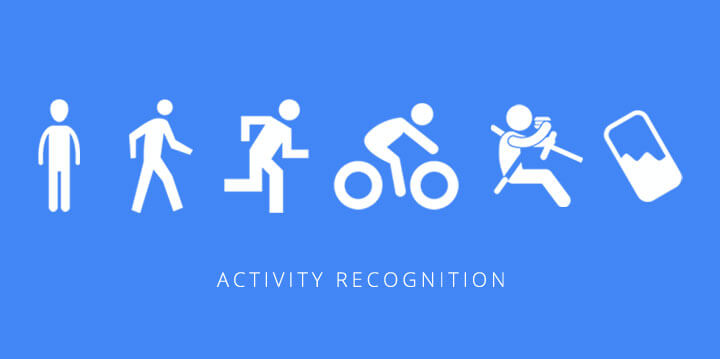

In [1]:
from IPython.core.display import Image, display
display(Image('https://www.androidhive.info/wp-content/uploads/2017/12/android-user-activity-recognition-still-walking-running-driving.jpg', width=600))

In [2]:
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
from sklearn import metrics

## Analyse avec dataset brut

In [3]:
# récupération de variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET BRUT)
%store -r activity_dataset_full
%store -r colonnes_source
%store -r colonnes_cible
%store -r source
%store -r cible

In [4]:
# afficher dataset
activity_dataset_full.head(None)

,Action,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,t14,t15,t16,t17,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
0,Se lever (chaise),0.635193,0.562164,0.283249,0.328735,0.045013,-1.713516,-2.079834,-0.962936,-2.556274,...,8.747101,9.652100,9.859192,10.802505,13.584579,12.082214,14.362686,0,0,1
1,S'assoir (chaise),-0.049545,0.103683,0.085724,-0.032791,0.163528,0.037842,0.217407,0.337112,0.559769,...,15.057007,14.237000,14.550629,14.302826,17.004684,14.766113,14.721832,0,0,1
2,Se lever (chaise),0.297607,-0.080673,0.219788,0.309570,0.875809,1.343872,1.078110,1.118820,0.959610,...,12.562241,13.444504,14.579376,14.591339,13.250595,13.529510,13.901810,0,0,1
3,S'assoir (chaise),0.073746,-0.011246,-0.050751,0.015091,-0.114197,0.004318,-0.012436,-0.044769,0.356262,...,14.497955,14.603302,13.281708,13.818008,13.615707,12.161224,12.683167,0,0,1
4,S'assoir (chaise),-0.215942,-0.227921,0.054596,0.242538,-0.502060,-0.815704,0.562164,-0.844421,-0.509247,...,11.858353,11.490845,12.709488,11.627335,16.178680,15.608887,13.404999,0,0,1
5,Se lever (chaise),0.656738,0.335907,0.605255,0.568146,0.474777,0.628006,0.953613,1.128387,1.390564,...,10.050735,10.024414,11.799683,12.848358,14.452469,14.219040,13.470856,0,0,1
6,S'assoir (chaise),0.250916,0.150360,0.199448,0.224579,0.292816,0.116852,0.067764,-0.024414,-0.112991,...,17.112427,15.128830,13.330780,14.136429,14.870270,12.547897,12.288101,0,0,1
7,Se lever (chaise),0.563370,0.684265,0.241348,0.832718,0.422104,0.766876,0.699829,0.875809,0.960800,...,11.926590,8.392746,8.573502,10.373947,13.592957,14.381851,14.163971,0,0,1
8,S'assoir (chaise),0.446045,0.211411,0.108459,-0.189621,-0.077087,0.341904,-0.041168,-0.728302,-0.229111,...,12.910599,10.436203,12.107361,13.580978,14.277695,14.428528,13.863510,0,0,1
9,Se lever (chaise),1.092484,-0.044769,0.268875,0.119232,-0.099838,-0.332062,0.110855,0.428085,0.504700,...,14.002365,14.732605,14.667953,13.225449,14.119690,14.590134,14.975616,0,0,1


In [5]:
# afficher les nombres d'exemple dans chaque classe 
count = Counter(activity_dataset_full.Action)
count

Counter({'Courrir': 60,
         'Marcher': 57,
         'Ne rien faire': 57,
         "S'allonger (depuis position assise)": 59,
         "S'allonger (depuis position debout)": 56,
         "S'assoir (chaise)": 52,
         "S'assoir (depuis position allongée)": 66,
         'Sauter': 56,
         'Se lever (chaise)': 51,
         'Se lever (depuis position allongée)': 51})

### Split data

In [6]:

x_train, x_test, y_train, y_test = train_test_split(source, cible, test_size=0.7)

display(x_train, y_train, x_test, y_test)


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t14,t15,t16,t17,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
241,13.452896,14.248978,13.993973,13.146439,11.952911,12.251007,14.707443,20.244049,21.266373,16.176300,...,11.187988,13.071014,14.483597,13.349945,13.928146,13.949677,14.083755,0,0,1
52,13.984406,13.153625,13.209869,13.105728,15.478394,16.916107,11.846375,9.960953,6.508514,4.156189,...,-3.571075,1.401672,4.641037,3.894043,0.976700,-1.837677,-0.538834,0,0,1
310,10.279373,16.154755,15.623230,14.403397,17.299179,16.313965,10.673233,17.888153,15.459244,7.259094,...,11.405838,14.861893,19.406067,11.863144,12.760971,23.427139,17.617599,0,0,1
480,14.538666,15.261719,14.766113,13.901810,12.492828,12.580215,11.763794,8.474167,3.464279,-6.885849,...,-8.725784,-7.072601,-9.716980,-7.850708,-7.719025,-6.549469,-6.666779,0,0,1
102,-17.251541,-12.306320,-14.406036,-9.070557,-8.650375,-11.572495,-16.128662,-20.177261,-9.956406,-8.175140,...,-14.580826,-9.181885,-9.280060,-12.143509,-16.496170,-18.259506,-9.973175,0,1,0
33,8.772232,8.736328,12.770538,5.212067,5.158173,9.477325,5.787857,6.106293,10.323685,11.606964,...,13.282913,16.056595,27.293777,35.094070,19.262421,10.923416,8.761459,0,0,1
512,13.094971,9.488708,1.896683,4.141251,12.368912,47.279388,46.752640,-5.316452,5.865082,2.577820,...,1.948151,24.902573,40.625275,35.663300,19.374954,11.281357,1.835632,0,0,1
73,12.571823,14.350723,12.801666,11.215500,11.360352,11.313675,12.082214,13.898209,15.335922,12.474854,...,13.458878,12.891464,11.387894,10.910248,12.555069,12.760971,14.592529,0,0,1
28,13.744980,16.919693,15.114471,15.692673,12.241409,9.689194,6.574356,8.970947,8.589081,2.857361,...,-18.076355,-11.767624,-10.326324,-4.284546,-6.215469,-8.941269,-9.564957,0,0,1
550,13.054260,12.057083,12.929749,12.110947,12.352768,11.690750,15.981171,12.300064,11.743423,16.881393,...,11.675201,10.992844,11.138901,11.407043,10.713943,10.406281,12.617310,0,0,1


,Action
241,Se lever (chaise)
52,S'allonger (depuis position assise)
310,Courrir
480,S'allonger (depuis position assise)
102,Marcher
33,Se lever (depuis position allongée)
512,Sauter
73,Marcher
28,S'allonger (depuis position debout)
550,S'assoir (depuis position allongée)


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t14,t15,t16,t17,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
203,11.712311,14.232208,12.096588,11.847580,12.930939,11.961304,14.676346,12.490417,13.566620,13.170364,...,14.207062,14.123276,13.140457,12.392258,12.320435,12.340790,11.924194,0,0,1
419,14.301636,13.139252,13.488800,12.007996,12.915390,12.863922,6.015305,3.355347,-4.532349,-8.336746,...,-4.325241,-9.342300,-4.947754,-5.056686,-8.324753,-7.142029,-5.606155,0,0,1
555,-10.647141,-9.642761,-11.900513,-9.762482,-7.614899,-7.334778,-7.999146,-6.812836,-4.948929,-2.194412,...,7.308182,8.652512,10.243469,12.264160,12.936951,13.068619,13.790482,0,0,1
229,13.615692,13.876663,13.920959,14.462051,12.163605,10.208740,13.156006,13.908981,11.234680,11.918198,...,11.477676,9.200790,11.419022,11.879898,12.364731,12.065460,11.307693,0,0,1
358,-8.025497,-9.306396,-8.061401,-6.418976,-10.498703,-10.874588,-7.997955,-4.296509,-1.951401,2.459915,...,16.553391,14.092133,14.094543,10.432602,9.051147,9.844833,11.687180,0,0,1
281,12.766953,11.888290,11.979263,10.446976,12.696320,8.869202,12.746597,11.393875,12.441345,12.822021,...,9.102631,10.456543,9.282196,8.196426,12.124100,7.407532,7.344086,0,0,1
69,13.876678,16.547394,13.984406,12.835175,12.416199,12.728638,13.703094,12.681976,11.919403,10.797729,...,16.707825,14.440506,11.778152,12.264175,13.120102,14.488388,13.770126,0,0,1
132,17.550568,18.225739,11.952911,11.526764,8.847656,1.705750,-13.684189,-22.910248,2.852554,-31.653854,...,-1.392365,-4.118149,-16.875656,-59.881516,-48.777206,-22.197968,-7.128860,0,0,1
104,-17.584335,-14.981842,-13.144287,-9.570953,-11.336670,-9.987534,-16.168167,-19.466187,-7.145615,-10.933258,...,-12.082458,-8.779663,-9.584122,-11.102036,-17.392792,-21.768219,-8.653961,0,1,0
452,13.094971,9.488708,1.896683,4.141251,12.368912,47.279388,46.752640,-5.316452,5.865082,2.577820,...,1.948151,24.902573,40.625275,35.663300,19.374954,11.281357,1.835632,0,0,1


,Action
203,S'assoir (chaise)
419,S'allonger (depuis position assise)
555,S'assoir (depuis position allongée)
229,Se lever (chaise)
358,Se lever (depuis position allongée)
281,S'allonger (depuis position debout)
69,Marcher
132,Sauter
104,Marcher
452,Sauter


In [7]:
# DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_train, y_train)

predict = clf.predict(x_test)


### Report

In [8]:
print(metrics.classification_report(y_test,predict))

                                     precision    recall  f1-score   support

                            Courrir       0.68      0.60      0.64        35
                            Marcher       0.51      0.63      0.56        38
                      Ne rien faire       0.44      0.39      0.41        49
S'allonger (depuis position assise)       0.69      0.47      0.56        43
S'allonger (depuis position debout)       0.41      0.59      0.48        34
                  S'assoir (chaise)       0.50      0.43      0.46        37
S'assoir (depuis position allongée)       0.46      0.76      0.57        41
                             Sauter       0.67      0.47      0.55        38
                  Se lever (chaise)       0.45      0.45      0.45        40
Se lever (depuis position allongée)       0.42      0.32      0.36        41

                        avg / total       0.52      0.51      0.50       396



### Accuracy

In [9]:
res=[]

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(source, cible, test_size=.4)
    clf = DecisionTreeClassifier().fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    res.append(accuracy_score(y_test, y_predict))
    
print('Average : ',np.average(res))

Average :  0.592123893805


### Graphe

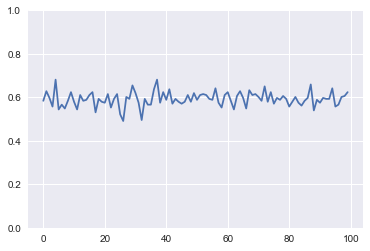

In [10]:
%matplotlib inline

plt.ylim([0,1])
plt.plot(res);

### Decision tree image

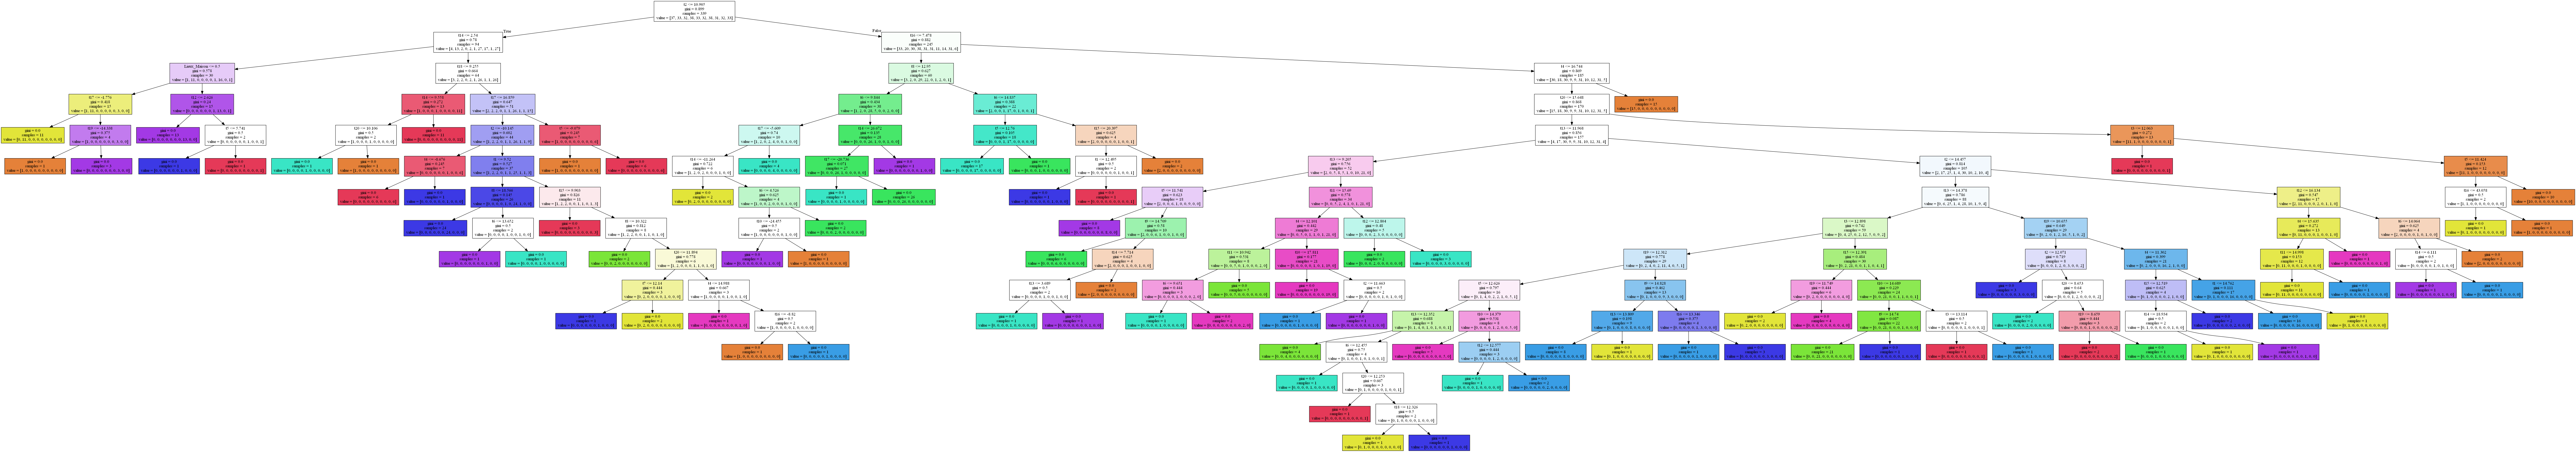

In [11]:
# Install Graphviz + set system path to dot
# pip install export_graphviz

with open("tree.dot", 'w') as f:
        export_graphviz(clf, out_file=f,
                        feature_names=source.columns,
                        filled=True)
        
!dot -Tpng tree.dot -o tree.png 
display(Image('tree.png'))



## Analyse avec dataset analysé

In [12]:
# récupération des variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET ANALYSE)
%store -r activity_dataset_analysed
%store -r colonnes_source_analysed
%store -r colonnes_cible_analysed
%store -r source_analysed
%store -r cible_analysed

In [13]:
x_analysed_train, x_analysed_test, y_analysed_train, y_analysed_test = train_test_split(source_analysed, cible_analysed, test_size=0.7)

display(x_analysed_train, y_analysed_train, x_analysed_test, y_analysed_test)

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
339,14.142441,14.227417,14.305237,14.178329,14.265717,14.232193,14.197495,14.239395,14.239395,14.276489,...,14.253754,14.250153,14.225021,0,0,1,14.239089,14.305237,14.142441,0.041462
537,13.252960,12.519150,11.529144,9.495270,7.838501,8.759064,11.793716,16.394180,23.455872,26.251099,...,16.706604,4.160995,12.393463,0,0,1,12.711528,26.251099,2.517380,6.923231
420,13.770126,15.140823,14.180725,13.218246,14.147202,15.914124,14.301636,12.770554,12.795685,11.645264,...,-4.228287,-1.834076,-0.437073,0,0,1,8.635818,15.914124,-4.228287,6.548424
338,14.314789,14.327972,14.289673,14.238190,14.245361,14.208267,14.225021,14.238190,14.306412,14.278885,...,14.379456,14.228622,14.211838,0,0,1,14.265722,14.379456,14.193909,0.048969
278,13.503174,11.457321,12.330017,12.199539,10.029190,7.408737,7.207626,15.711823,14.005951,5.976990,...,4.935532,5.783066,4.848145,0,0,1,10.659939,18.764420,4.386047,4.463768
311,16.212219,14.793640,14.271698,14.063416,12.036728,15.283264,16.962784,14.995941,26.005692,14.242981,...,10.511612,11.535141,7.523651,0,0,1,13.220895,26.916687,1.102402,6.577299
1,13.106934,13.467255,13.371490,13.674347,13.135651,12.434174,11.836823,10.353607,9.767014,9.036789,...,17.004684,14.766113,14.721832,0,0,1,13.405908,17.004684,9.036789,1.936284
404,14.448883,13.967651,12.019958,12.664001,11.525558,8.730316,7.502106,8.621399,12.732224,11.416626,...,14.213043,10.112976,13.701904,0,0,1,11.176185,16.188263,6.750320,2.556758
254,12.383881,13.310440,13.003983,12.966873,13.297272,13.132065,12.503601,12.055862,9.265442,3.623489,...,3.082413,15.645981,19.457550,0,0,1,13.164032,44.415909,-0.449036,9.153884
297,12.867523,12.598160,14.645218,18.498672,10.369156,29.695160,1.796722,13.494797,19.992661,24.702042,...,-5.425400,41.939102,22.100754,0,0,1,17.042641,41.939102,-5.425400,10.322377


,Action
339,Ne rien faire
537,S'allonger (depuis position debout)
420,S'allonger (depuis position assise)
338,Ne rien faire
278,S'allonger (depuis position debout)
311,Courrir
1,S'assoir (chaise)
404,S'allonger (depuis position assise)
254,Sauter
297,Courrir


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t18,t19,t20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_t,max_t,min_t,ecart_type_t
481,12.966858,12.721451,12.531128,12.655624,13.413391,14.183136,13.979614,16.221786,14.429733,15.812378,...,13.245804,10.956940,13.183548,0,0,1,12.653709,17.135162,8.421478,2.468941
402,13.237411,14.406982,13.785675,12.917786,13.910187,14.186722,16.120026,14.545837,11.623734,5.510117,...,11.689560,10.106995,10.982086,0,0,1,12.111122,16.896957,5.510117,2.875777
348,13.217056,13.861115,13.348740,12.508377,12.330032,13.521118,13.128479,13.270935,12.951324,13.077011,...,12.829193,12.484436,12.902206,0,0,1,13.013319,13.861115,12.330032,0.380551
480,14.538666,15.261719,14.766113,13.901810,12.492828,12.580215,11.763794,8.474167,3.464279,-6.885849,...,-7.719025,-6.549469,-6.666779,0,0,1,1.640864,15.261719,-9.716980,10.047770
449,12.999191,9.756256,5.700470,5.918335,7.527252,11.244232,43.712006,55.412491,-2.151321,-4.137299,...,25.410736,13.275726,12.115723,0,0,1,12.464808,55.412491,-4.137299,16.021727
556,10.669617,10.239868,14.318405,10.263809,6.898773,8.337677,10.298538,10.434998,12.106155,15.198273,...,11.379517,10.577469,9.878342,0,0,1,11.862425,19.936401,6.898773,3.037253
290,15.724991,12.453308,11.111374,14.363892,11.750626,6.708420,11.934967,13.753357,22.874069,18.165878,...,0.269226,-0.068359,-0.583115,0,0,1,10.785513,22.874069,-0.583115,6.645501
498,9.157700,10.874344,12.277344,10.814484,11.031143,13.311646,15.363480,14.093338,13.928146,22.207291,...,9.782578,8.362839,11.681183,0,0,1,12.379155,22.207291,8.362839,3.191725
465,10.189590,10.251846,10.256622,10.231491,10.233887,10.256638,10.236282,10.233902,10.221924,10.237488,...,10.251846,10.256638,10.227905,0,0,1,10.238018,10.256638,10.189590,0.017011
2,14.025116,13.000397,13.145233,15.503525,15.268906,16.273270,15.851883,17.410522,13.566620,12.085800,...,13.250595,13.529510,13.901810,0,0,1,13.712905,17.410522,10.096222,1.837586


,Action
481,S'allonger (depuis position assise)
402,S'allonger (depuis position assise)
348,Ne rien faire
480,S'allonger (depuis position assise)
449,Sauter
556,S'assoir (depuis position allongée)
290,S'allonger (depuis position debout)
498,S'assoir (depuis position allongée)
465,Ne rien faire
2,Se lever (chaise)


In [14]:
# DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x_analysed_train, y_analysed_train)

predict = clf.predict(x_analysed_test)

### Report

In [15]:
print(metrics.classification_report(y_analysed_test,predict))

                                     precision    recall  f1-score   support

                            Courrir       0.75      0.49      0.59        43
                            Marcher       0.75      0.77      0.76        35
                      Ne rien faire       0.93      0.93      0.93        44
S'allonger (depuis position assise)       0.68      0.74      0.71        38
S'allonger (depuis position debout)       0.59      0.33      0.43        39
                  S'assoir (chaise)       0.28      0.40      0.33        35
S'assoir (depuis position allongée)       0.46      0.62      0.53        45
                             Sauter       0.54      0.54      0.54        39
                  Se lever (chaise)       0.49      0.51      0.50        41
Se lever (depuis position allongée)       0.25      0.22      0.23        37

                        avg / total       0.58      0.56      0.56       396



### Accuracy

In [16]:
res=[]

for i in range(100):
    x_analysed_train, x_analysed_test, y_analysed_train, y_analysed_test = train_test_split(source_analysed, cible_analysed, test_size=.4)
    clf = DecisionTreeClassifier().fit(x_analysed_train, y_analysed_train)
    y_predict = clf.predict(x_analysed_test)
    res.append(accuracy_score(y_analysed_test, y_predict))

print('Average : ',np.average(res))

Average :  0.66017699115


### Graphe

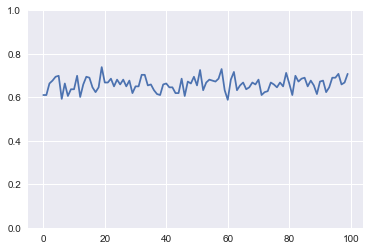

In [17]:
%matplotlib inline

plt.ylim([0,1])
plt.plot(res);